# Developing Fronts

In [21]:
# imports
import numpy as np

import xarray

from ulmo import io as ulmo_io
from ulmo.llc import kinematics
from ulmo.plotting import plotting

# Load up an example

In [4]:
llc_tbl_file = '/home/xavier/Projects/Oceanography/SST/LLC/Tables/LLC_uniform144_r0.5.parquet'
llc_tbl = ulmo_io.load_main_table(llc_tbl_file)

Read main table: /home/xavier/Projects/Oceanography/SST/LLC/Tables/LLC_uniform144_r0.5.parquet


In [5]:
llc_tbl.head()

,lat,lon,row,col,datetime,filename,pp_file,pp_root,field_size,pp_idx,pp_type,mean_temperature,Tmin,Tmax,T90,T10,LL
0,56.752953,-170.447922,11465,10890,2011-09-18,/data/Projects/Oceanography/data/LLC/ThetaUVSa...,s3://llc/PreProc/LLC_uniform144_preproc.h5,llc_144,64,-1,-1,NaN,NaN,NaN,NaN,NaN,NaN
1,56.796970,-155.677078,11469,11599,2011-09-18,/data/Projects/Oceanography/data/LLC/ThetaUVSa...,s3://llc/PreProc/LLC_uniform144_preproc.h5,llc_144,64,-1,-1,NaN,NaN,NaN,NaN,NaN,NaN
2,56.818966,-155.635422,11471,11601,2011-09-18,/data/Projects/Oceanography/data/LLC/ThetaUVSa...,s3://llc/PreProc/LLC_uniform144_preproc.h5,llc_144,64,-1,-1,NaN,NaN,NaN,NaN,NaN,NaN
3,56.631676,-152.864578,11454,11734,2011-09-18,/data/Projects/Oceanography/data/LLC/ThetaUVSa...,s3://llc/PreProc/LLC_uniform144_preproc.h5,llc_144,64,-1,-1,NaN,NaN,NaN,NaN,NaN,NaN
4,56.917801,-152.114578,11480,11770,2011-09-18,/data/Projects/Oceanography/data/LLC/ThetaUVSa...,s3://llc/PreProc/LLC_uniform144_preproc.h5,llc_144,64,-1,-1,NaN,NaN,NaN,NaN,NaN,NaN


# Low LL

In [10]:
low_LL = llc_tbl.LL < -1000.
np.sum(low_LL)
ran_idx = np.where(low_LL)[0][50]

In [15]:
cutout = llc_tbl.iloc[ran_idx]
cutout

lat                                                         43.011658
lon                                                         -48.59375
row                                                             10371
col                                                             16739
datetime                                          2011-09-18 00:00:00
filename            /data/Projects/Oceanography/data/LLC/ThetaUVSa...
pp_file                    s3://llc/PreProc/LLC_uniform144_preproc.h5
pp_root                                                       llc_144
field_size                                                         64
pp_idx                                                         348384
pp_type                                                             0
mean_temperature                                            17.711548
Tmin                                                           11.469
Tmax                                                        22.101002
T90                 

# Grab the data

In [16]:
llc_file = '/home/xavier/Projects/Oceanography/data/LLC/ThetaUVSalt/LLC4320_2011-09-13T00_00_00.nc'

In [17]:
ds = xarray.open_dataset(llc_file)
ds

<xarray.Dataset>
Dimensions:  (i: 17280, i_g: 17280, j: 12960, j_g: 12960, k_l: 1)
Coordinates:
  * i        (i) int64 0 1 2 3 4 5 6 ... 17274 17275 17276 17277 17278 17279
  * i_g      (i_g) int64 0 1 2 3 4 5 6 ... 17274 17275 17276 17277 17278 17279
  * j        (j) int64 0 1 2 3 4 5 6 ... 12954 12955 12956 12957 12958 12959
  * j_g      (j_g) int64 0 1 2 3 4 5 6 ... 12954 12955 12956 12957 12958 12959
Dimensions without coordinates: k_l
Data variables:
    Theta    (j, i) float32 ...
    U        (j, i_g) float32 ...
    V        (j_g, i) float32 ...
    W        (k_l, j, i) float32 ...
    Salt     (j, i) float32 ...

## Grab it

In [18]:
# U field
U_cutout = ds.U[cutout.row:cutout.row+cutout.field_size, 
                cutout.col:cutout.col+cutout.field_size]
# Vfield
V_cutout = ds.V[cutout.row:cutout.row+cutout.field_size, 
                cutout.col:cutout.col+cutout.field_size]
# SST
SST_cutout = ds.Theta[cutout.row:cutout.row+cutout.field_size, 
                cutout.col:cutout.col+cutout.field_size]
Salt_cutout = ds.Salt[cutout.row:cutout.row+cutout.field_size, 
                cutout.col:cutout.col+cutout.field_size]

# Generate

In [20]:
Divb2 = kinematics.calc_divb(SST_cutout, Salt_cutout)

<AxesSubplot:>

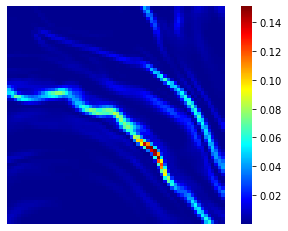

In [23]:
plotting.show_image(Divb2, set_aspect='equal')

## Show SST

<AxesSubplot:>

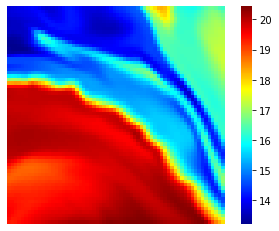

In [25]:
plotting.show_image(SST_cutout, set_aspect='equal')